In [1]:
import pandas as pd
import numpy as np
import os,sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


train_data = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-profitable-customers/data/processed/train_processed.csv')


X_train = train_data.drop(['important_customer'],axis=1)
y_train = train_data['important_customer']

rf = RandomForestClassifier(class_weight={0:1,1:7},n_jobs=-1)

rf.fit(X_train,y_train)

## read test data
test_data = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-profitable-customers/data/processed/test_processed.csv')

X_test = test_data.drop(['important_customer'],axis=1)
y_test = test_data['important_customer']

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3622
           1       0.95      0.40      0.56       753

    accuracy                           0.89      4375
   macro avg       0.92      0.70      0.75      4375
weighted avg       0.90      0.89      0.87      4375



In [74]:
y_pred[22]

0

In [2]:
import shap
explainer = shap.Explainer(rf, X_train)

In [79]:
X_test_1 = pd.DataFrame([X_test.iloc[0]])
X_test_1

,purchase_amount,asset_amount,average_ratio,personal_id_2,average_favorite_score,card_history_period,total_amount_1,total_amount_2,total_amount_3,job_type_Self employed,...,score_4,personal_id_1,age,personal_card_1,personal_card_3,car,purchase_score,score_1,score_2,score_3
0,0.025682,-0.184504,0.136235,-0.157895,0.770561,0.302368,-0.055462,-0.100861,-0.357058,0.0,...,0.0,0.475726,0.586207,1.0,0.0,1.0,0.832349,0.0,0.2,0.066667


In [81]:
shap_values_1= explainer(X_test_1,check_additivity=False)

In [96]:
shap_values_1[0]

.values =
array([[ 1.42845857e-03, -1.42845851e-03],
       [-1.27789417e-03,  1.27789433e-03],
       [-2.57580642e-04,  2.57580540e-04],
       [ 1.19685279e-02, -1.19685282e-02],
       [ 2.67774860e-03, -2.67774902e-03],
       [ 3.30433496e-03, -3.30433510e-03],
       [ 5.90540294e-03, -5.90540300e-03],
       [ 1.48888728e-02, -1.48888733e-02],
       [ 2.43288365e-02, -2.43288374e-02],
       [ 1.58902485e-03, -1.58902487e-03],
       [ 7.44761781e-04, -7.44761906e-04],
       [ 1.70229781e-04, -1.70229775e-04],
       [ 1.77914880e-04, -1.77914864e-04],
       [ 2.92807609e-03, -2.92807612e-03],
       [ 1.40117964e-03, -1.40117965e-03],
       [ 5.96106650e-03, -5.96106673e-03],
       [ 2.76558079e-03, -2.76558085e-03],
       [ 3.04804832e-03, -3.04804838e-03],
       [ 5.26712032e-03, -5.26712004e-03],
       [ 5.17629879e-04, -5.17629873e-04],
       [-2.57088158e-02,  2.57088169e-02],
       [ 1.71703102e-03, -1.71703105e-03],
       [ 1.96915107e-03, -1.96915115e-03],
 

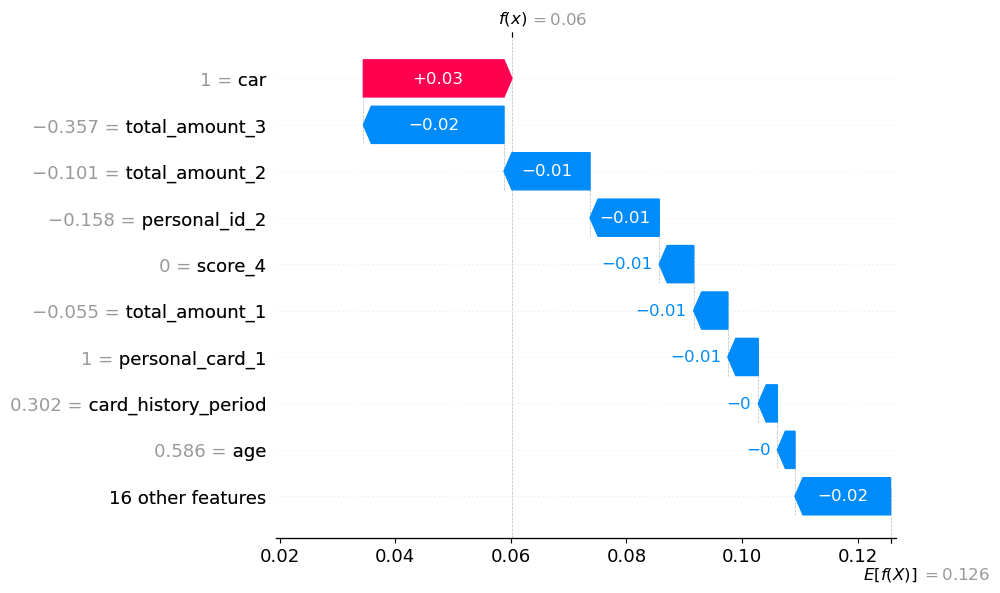

In [98]:
shap.plots.waterfall(shap_values_1[0][:,1])

In [3]:
shap_values = explainer(X_test, check_additivity=False)

100%|===================| 8749/8750 [04:19<00:00]        

In [5]:
print(shap_values)

.values =
array([[[ 1.42845857e-03, -1.42845851e-03],
        [-1.27789417e-03,  1.27789433e-03],
        [-2.57580642e-04,  2.57580540e-04],
        ...,
        [ 1.96915107e-03, -1.96915115e-03],
        [-1.11100116e-04,  1.11100309e-04],
        [ 9.63925346e-05, -9.63925073e-05]],

       [[ 1.28053960e-03, -1.28053979e-03],
        [ 6.48969285e-03, -6.48969315e-03],
        [-1.24232673e-02,  1.24232676e-02],
        ...,
        [ 2.51334046e-03, -2.51334056e-03],
        [-1.17223584e-03,  1.17223581e-03],
        [-1.08368200e-03,  1.08368184e-03]],

       [[-1.21297266e-03,  1.21297264e-03],
        [-9.68760921e-03,  9.68760956e-03],
        [-1.37399006e-03,  1.37398986e-03],
        ...,
        [-2.97066433e-02,  2.97066441e-02],
        [ 2.11426055e-03, -2.11426053e-03],
        [ 8.96309506e-04, -8.96309494e-04]],

       ...,

       [[ 5.43181452e-03, -5.43181437e-03],
        [-1.49876848e-02,  1.49876850e-02],
        [ 4.57359397e-03, -4.57359397e-03],
        

In [4]:
X_test.shape

(4375, 25)

In [6]:
shap_values.shape

(4375, 25, 2)

In [26]:
shap_values[0]

.values =
array([[ 1.42845857e-03, -1.42845851e-03],
       [-1.27789417e-03,  1.27789433e-03],
       [-2.57580642e-04,  2.57580540e-04],
       [ 1.19685279e-02, -1.19685282e-02],
       [ 2.67774860e-03, -2.67774902e-03],
       [ 3.30433496e-03, -3.30433510e-03],
       [ 5.90540294e-03, -5.90540300e-03],
       [ 1.48888728e-02, -1.48888733e-02],
       [ 2.43288365e-02, -2.43288374e-02],
       [ 1.58902485e-03, -1.58902487e-03],
       [ 7.44761781e-04, -7.44761906e-04],
       [ 1.70229781e-04, -1.70229775e-04],
       [ 1.77914880e-04, -1.77914864e-04],
       [ 2.92807609e-03, -2.92807612e-03],
       [ 1.40117964e-03, -1.40117965e-03],
       [ 5.96106650e-03, -5.96106673e-03],
       [ 2.76558079e-03, -2.76558085e-03],
       [ 3.04804832e-03, -3.04804838e-03],
       [ 5.26712032e-03, -5.26712004e-03],
       [ 5.17629879e-04, -5.17629873e-04],
       [-2.57088158e-02,  2.57088169e-02],
       [ 1.71703102e-03, -1.71703105e-03],
       [ 1.96915107e-03, -1.96915115e-03],
 

In [11]:
X_test.iloc[0,:]

purchase_amount           0.025682
asset_amount             -0.184504
average_ratio             0.136235
personal_id_2            -0.157895
average_favorite_score    0.770561
card_history_period       0.302368
total_amount_1           -0.055462
total_amount_2           -0.100861
total_amount_3           -0.357058
job_type_Self employed    0.000000
area                      0.460887
personal_card_2           0.000000
personal_card_4           0.000000
campaign_use              0.000000
card_expired              0.000000
score_4                   0.000000
personal_id_1             0.475726
age                       0.586207
personal_card_1           1.000000
personal_card_3           0.000000
car                       1.000000
purchase_score            0.832349
score_1                   0.000000
score_2                   0.200000
score_3                   0.066667
Name: 0, dtype: float64

In [34]:
rf.predict_proba(X_test.iloc[0,:].values.reshape(1,-1))

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.94, 0.06]])

### Partial Dependency Plot

In [37]:
def partial_dep_plot(feature):
    feature_index = X_test.columns.get_loc(feature)

    shap.dependence_plot(feature_index, shap_values[0][:,1], X_test, feature_names=X_test)

In [38]:
partial_dep_plot('purchase_amount')

ValueError: cannot reshape array of size 0 into shape (25,1)

### Waterfall Plot

In [27]:
shap_values[0]

.values =
array([[ 1.42845857e-03, -1.42845851e-03],
       [-1.27789417e-03,  1.27789433e-03],
       [-2.57580642e-04,  2.57580540e-04],
       [ 1.19685279e-02, -1.19685282e-02],
       [ 2.67774860e-03, -2.67774902e-03],
       [ 3.30433496e-03, -3.30433510e-03],
       [ 5.90540294e-03, -5.90540300e-03],
       [ 1.48888728e-02, -1.48888733e-02],
       [ 2.43288365e-02, -2.43288374e-02],
       [ 1.58902485e-03, -1.58902487e-03],
       [ 7.44761781e-04, -7.44761906e-04],
       [ 1.70229781e-04, -1.70229775e-04],
       [ 1.77914880e-04, -1.77914864e-04],
       [ 2.92807609e-03, -2.92807612e-03],
       [ 1.40117964e-03, -1.40117965e-03],
       [ 5.96106650e-03, -5.96106673e-03],
       [ 2.76558079e-03, -2.76558085e-03],
       [ 3.04804832e-03, -3.04804838e-03],
       [ 5.26712032e-03, -5.26712004e-03],
       [ 5.17629879e-04, -5.17629873e-04],
       [-2.57088158e-02,  2.57088169e-02],
       [ 1.71703102e-03, -1.71703105e-03],
       [ 1.96915107e-03, -1.96915115e-03],
 

In [31]:
shap_values[0][:,1]

.values =
array([-1.42845851e-03,  1.27789433e-03,  2.57580540e-04, -1.19685282e-02,
       -2.67774902e-03, -3.30433510e-03, -5.90540300e-03, -1.48888733e-02,
       -2.43288374e-02, -1.58902487e-03, -7.44761906e-04, -1.70229775e-04,
       -1.77914864e-04, -2.92807612e-03, -1.40117965e-03, -5.96106673e-03,
       -2.76558085e-03, -3.04804838e-03, -5.26712004e-03, -5.17629873e-04,
        2.57088169e-02, -1.71703105e-03, -1.96915115e-03,  1.11100309e-04,
       -9.63925073e-05])

.base_values =
0.12569999999999998

.data =
array([ 0.02568166, -0.18450413,  0.13623481, -0.15789474,  0.77056105,
        0.30236778, -0.05546226, -0.10086107, -0.35705813,  0.        ,
        0.46088737,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.47572559,  0.5862069 ,  1.        ,  0.        ,
        1.        ,  0.83234947,  0.        ,  0.2       ,  0.06666667])

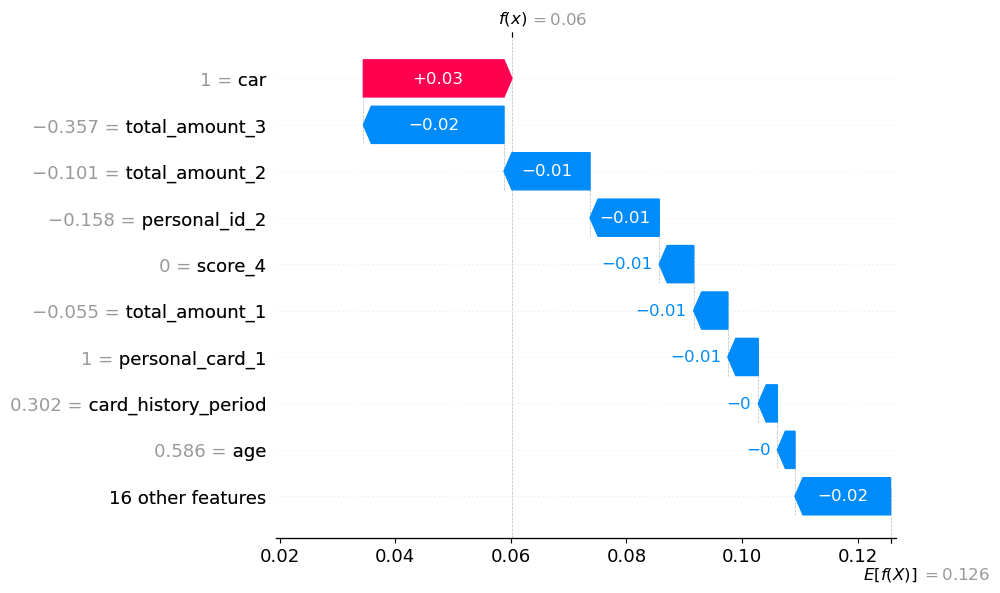

In [89]:
shap.plots.waterfall(shap_values[0][:,1])

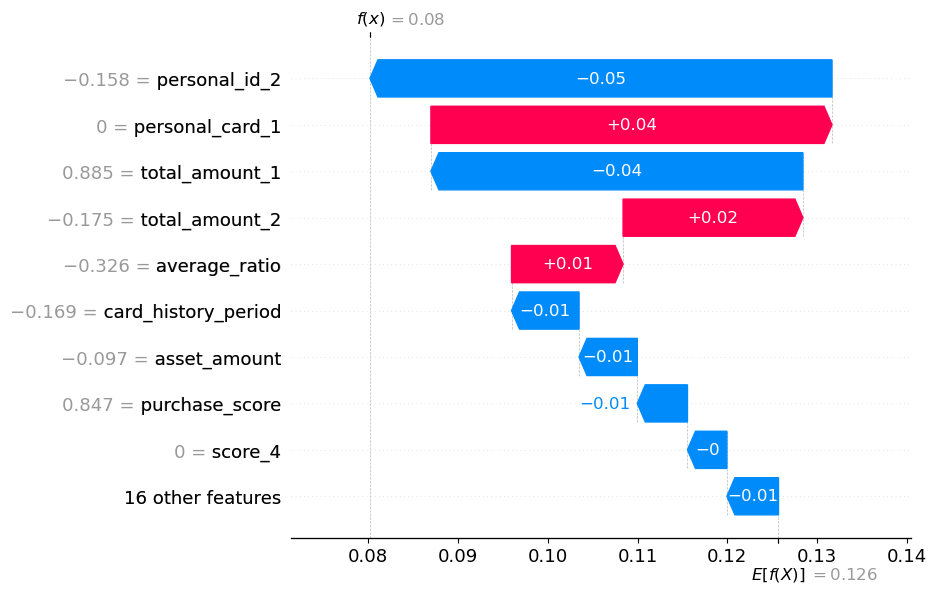

In [39]:
shap.plots.waterfall(shap_values[1][:,1])

In [45]:
shap.initjs()
shap.plots.force(shap_values[1][:,1])

In [69]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[:, :, 1].values, X_test)

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\shap\plots\_force.py:208: UserWarning: shap.plots.force is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.plots.force is slow for many thousands of rows, try subsampling your data.")


KeyboardInterrupt: 

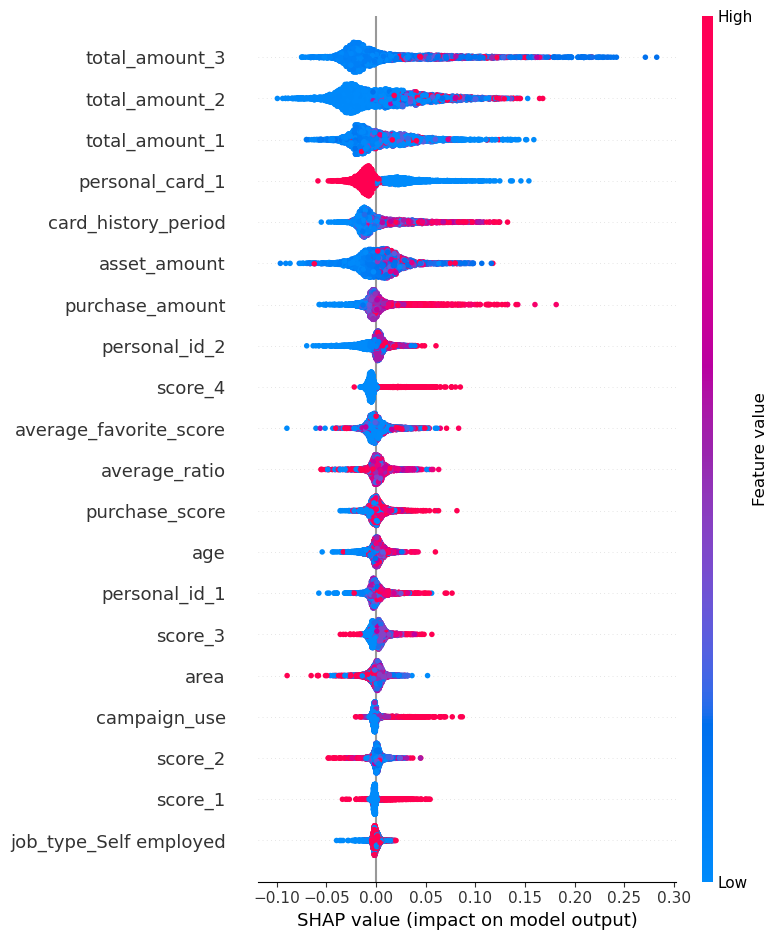

In [72]:
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names = X_test.columns)

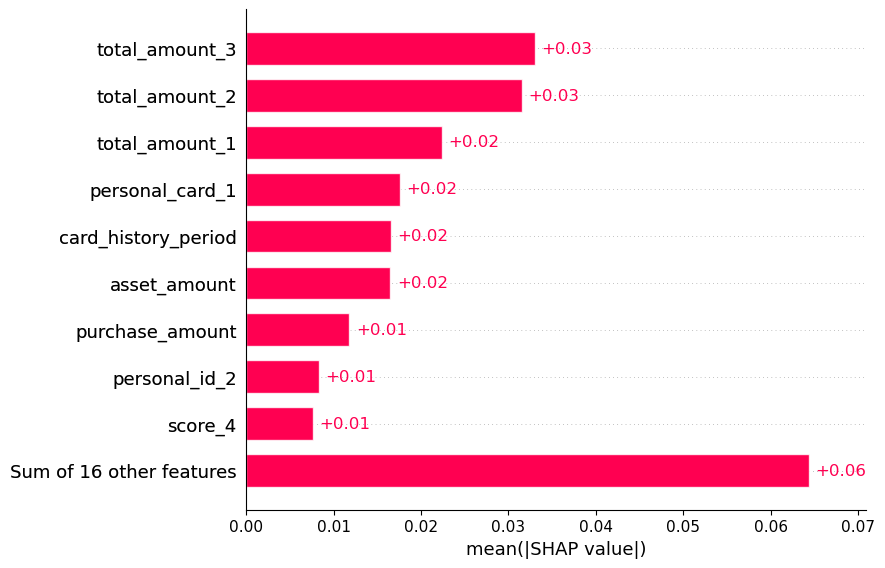

In [63]:
shap.plots.bar(shap_values[:, :, 1])

In [64]:
pd.DataFrame(sorted(rf.feature_importances_,reverse=True), index=X_test.columns)

,0
purchase_amount,0.107482
asset_amount,0.104086
average_ratio,0.090232
personal_id_2,0.075389
average_favorite_score,0.072741
card_history_period,0.063183
total_amount_1,0.059963
total_amount_2,0.054500
total_amount_3,0.052715
job_type_Self employed,0.049426
